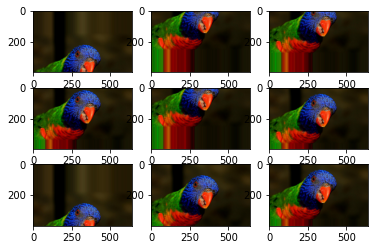

kbnk


In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img("/content/drive/My Drive/bird/bird.jpg")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
print('kbnk')

!pip install -q k

```
# This is formatted as code
```

eras

In [ ]:
!pip install -q keras

## **DATA AUGMENTATION**



In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
from matplotlib import pyplot
import numpy as np
import keras,glob,os
#import cv2

img_path=r'/content/drive/My Drive/Dataset/Plank pose'
outpath=r'/content/drive/My Drive/Dataset/Plank pose'
#used to find specific filename on this pattern for example D:\FYP\Pose-Warrior 1
filename= glob.glob(img_path + "/**/*.jpg", recursive=True)

#filename has all the folder files so for every img
for img in filename:
    if "DS_Store" in img: continue #used to parse directory in windows
    src_fname,ext=os.path.splitext(img) #splitting the path in root and ext,ext is for extension so it stores extension
    
    
# create or define datagen, image data augmentation generator
    datagen = ImageDataGenerator(horizontal_flip=True,height_shift_range=0.05, 
                                 width_shift_range=0.05, fill_mode='constant', 
                                  zoom_range=0.05)
# prepare iterator
    img=load_img(img) #from library
    x=img_to_array(img)  #converting input img to array bcuz datagenerator works with array imgs
    x=x.reshape((1,) +x.shape)  #reshaping the input image
    img_name=src_fname.split('/')[-1] #new image name will come through this method
    new_dir=os.path.join(outpath,src_fname.split('/')[-1].rsplit('-',1)[0]) #for putting new img in the new directory 
    if not os.path.lexists(new_dir): #to mkdir if it doesnt exist
        os.mkdir(new_dir)
    save_fname=new_dir 
    
    i=0 
    #taking iterator 0 to add 1 for each augmented iteration
    #datagen Takes data & label arrays, generates batches of augmented data
    #x is input data or numpy array 
    for batch in datagen.flow(x, batch_size=1,save_to_dir=save_fname, save_prefix=img_name, save_format='jpg'):
        i += 1
        if i > 5: #you can generate even 20 imgs and their pairs
            break 


In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
from matplotlib import pyplot
import numpy as np
import keras,glob,os
#import cv2

img_path=r'/content/drive/My Drive/Dataset/Pose-Warrior 1'
outpath=r'/content/drive/My Drive/Dataset/Pose-Warrior 1'
filename= glob.glob(img_path + "/**/*.jpg", recursive=True)

for img in filename:
    if "DS_Store" in img: continue
    src_fname,ext=os.path.splitext(img)
    
    
# create image data augmentation generator
    datagen = ImageDataGenerator(cval =0.1,rotation_range=8) 
# prepare iterator
    img=load_img(img)
    x=img_to_array(img)
    x=x.reshape((1,) +x.shape)
    img_name=src_fname.split('/')[-1]
    new_dir=os.path.join(outpath,src_fname.split('/')[-1].rsplit('-',1)[0])
    if not os.path.lexists(new_dir):
        os.mkdir(new_dir)
    save_fname=new_dir
    
    i=0
    for batch in datagen.flow(x, batch_size=1,save_to_dir=save_fname, save_prefix=img_name, save_format='jpg'):
        i += 1
        if i > 4:
            break 


## **TESTING MODEL NOT REAL**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
#from Keras import backend as K
#K.common.image_dim_ordering()
#K.common.set_image_dim_ordering(dim_ordering)


img_size=48
batch_size=16

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')


model=Sequential()
#1 conv pass 64 filters each 3,3 padding is same, input shape 
#we already know and putting 1 instead of 3 since grayscale images reuired rgb hum 3 he daalenge
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1))) 
#this normalization works wee with cov nn
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#this shrinks the height width dimension by 2
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.25))
    
    
#2-conv layer
#increase the no. of filters 128
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#this shrinks the height width dimension by 2
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.25))
    
#3-conv layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#this shrinks the height width dimension by 2
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.5))
    
#4-conv layer
    
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#this shrinks the height width dimension by 2
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.5))
    
model.add(Flatten())
    
model.add(Dense(64))
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.5))
    
 
model.add(Dense(64))
model.add(BatchNormalization())
#non linearity relu
model.add(Activation('relu'))
#dropout regulization to ovaid over fitting
model.add(Dropout(0.5))
    
model.add(Dense(7,activation='softmax'))
    
opt=Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800)
model.save_weights('first_try.h5') 


Found 16066 images belonging to 2 classes.
Found 11247 images belonging to 2 classes.
Found 4819 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_21 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       204

UnimplementedError: ignored

## **CNN MODEL**

In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
#import utils

img_size=48 #converting img into array size of 48
batch_size=32


#we have 3 sets of convolutions followed by pooling input shape is 48 by 48
#we will define a sequential layer
model = Sequential()
#32 filters with 3x3 matrix of pixels which generate dot product with the random 3x3 matrix, done for all 32 filters 
# Note the input shape is the desired size of the input image 48,48 with 3 bytes color
model.add(Conv2D(32,kernel_size= (3, 3), activation='linear',input_shape=( 48, 48,3),padding='same'))
#
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))#reduce image size and overfitting


model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

 
model.add(Conv2D(128, (3, 3),activation='linear',padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
 # Flatten the results to feed into a DNN
model.add(Flatten())  # sends the pooled matrix in one column to NN

#here we have 128 neurons with linear activation fn (neurons are densely connected)
model.add(Dense(128,activation='linear')) #used as an activation function because works for categorical

#here we have 3 neurons with softmax activation bcuz of 3 poses and categorical classification problm
model.add(Dense(3,activation='softmax')) #softmax works good with categorical data

#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

## **FITTING MODEL**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
#from Keras import backend as K
#K.common.image_dim_ordering()
#K.common.set_image_dim_ordering(dim_ordering)


img_size=48
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

h=model.fit(x=train_generator,epochs=10,verbose=1, validation_data=validation_generator)

## **VALIDATING MODEL AND PLOTTING 5 EPOCHS**

Found 18216 images belonging to 3 classes.
Found 12752 images belonging to 3 classes.
Found 5464 images belonging to 3 classes.
Epoch 1/5
399/399 [==============================] - 246s 616ms/step - loss: 0.4902 - accuracy: 0.9780 - val_loss: 7.2428 - val_accuracy: 0.8622
Epoch 2/5
399/399 [==============================] - 243s 608ms/step - loss: 0.4061 - accuracy: 0.9826 - val_loss: 10.5320 - val_accuracy: 0.8675
Epoch 3/5
399/399 [==============================] - 241s 604ms/step - loss: 1.9393 - accuracy: 0.9691 - val_loss: 17.9544 - val_accuracy: 0.8878
Epoch 4/5
399/399 [==============================] - 244s 613ms/step - loss: 0.3577 - accuracy: 0.9914 - val_loss: 16.6028 - val_accuracy: 0.8810
Epoch 5/5
399/399 [==============================] - 241s 603ms/step - loss: 0.4474 - accuracy: 0.9889 - val_loss: 19.6394 - val_accuracy: 0.8695
Test loss: {score[0]} / Test accuracy: {score[1]}


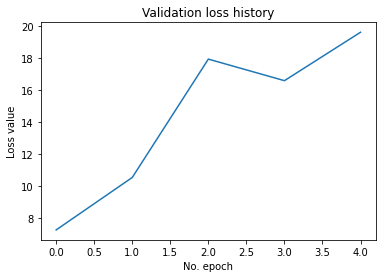

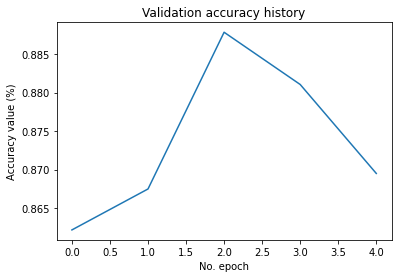

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import Sequence

img_size=48
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

history=model.fit(x=train_generator,epochs=5,verbose=1, validation_data=validation_generator)
score = model.evaluate( validation_generator, verbose=0)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

#Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **PLOTTING 3 EPOCHS**

Found 18216 images belonging to 3 classes.
Found 12752 images belonging to 3 classes.
Found 5464 images belonging to 3 classes.
Epoch 1/3
399/399 [==============================] - 3916s 10s/step - loss: 20.0872 - accuracy: 0.8872 - val_loss: 7.0774 - val_accuracy: 0.8710
Epoch 2/3
399/399 [==============================] - 240s 601ms/step - loss: 0.4672 - accuracy: 0.9766 - val_loss: 6.3567 - val_accuracy: 0.8862
Epoch 3/3
399/399 [==============================] - 236s 592ms/step - loss: 0.7392 - accuracy: 0.9774 - val_loss: 9.3870 - val_accuracy: 0.8737
Test loss: {score[0]} / Test accuracy: {score[1]}


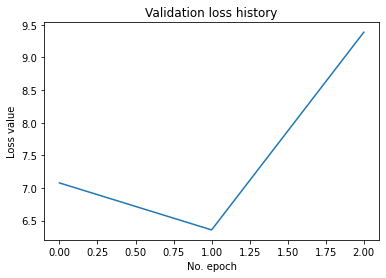

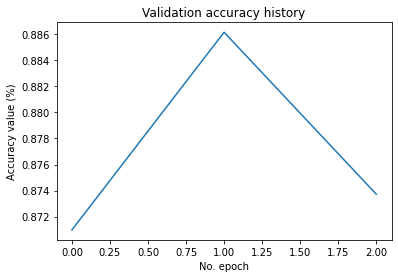

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import Sequence

img_size=48
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

history=model.fit(x=train_generator,epochs=3,verbose=1, validation_data=validation_generator)
score = model.evaluate( validation_generator, verbose=0)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

#Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **PLOTTING 10 EPOCHS**

Found 18216 images belonging to 3 classes.
Found 12752 images belonging to 3 classes.
Found 5464 images belonging to 3 classes.
Epoch 1/10
399/399 [==============================] - 248s 623ms/step - loss: 0.1465 - accuracy: 0.9950 - val_loss: 17.9417 - val_accuracy: 0.8529
Epoch 2/10
399/399 [==============================] - 244s 611ms/step - loss: 0.4703 - accuracy: 0.9898 - val_loss: 15.2854 - val_accuracy: 0.8673
Epoch 3/10
399/399 [==============================] - 246s 616ms/step - loss: 0.1468 - accuracy: 0.9946 - val_loss: 15.3373 - val_accuracy: 0.8805
Epoch 4/10
399/399 [==============================] - 243s 609ms/step - loss: 0.1353 - accuracy: 0.9947 - val_loss: 9.7460 - val_accuracy: 0.8699
Epoch 5/10
399/399 [==============================] - 245s 614ms/step - loss: 0.0731 - accuracy: 0.9958 - val_loss: 10.5167 - val_accuracy: 0.8776
Epoch 6/10
399/399 [==============================] - 240s 602ms/step - loss: 0.3073 - accuracy: 0.9885 - val_loss: 12.1793 - val_accuracy

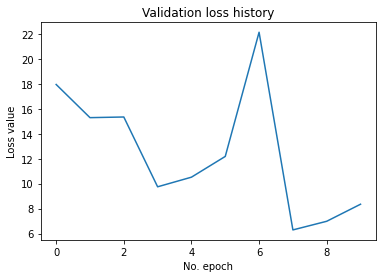

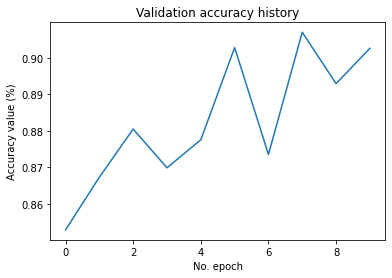

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import Sequence

img_size=48
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

history=model.fit(x=train_generator,epochs=10,verbose=1, validation_data=validation_generator)
score = model.evaluate( validation_generator, verbose=0)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

#Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()




## **SETTING ACCURACY AND LOSS**




In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
#import utils

img_size=48 #converting img into array size of 48
batch_size=32


#we have 3 sets of convolutions followed by pooling input shape is 48 by 48
#we will define a sequential layer
model = Sequential()
#32 filters with 3x3 matrix of pixels which generate dot product with the random 3x3 matrix, done for all 32 filters 
# Note the input shape is the desired size of the input image 48,48 with 3 bytes color
model.add(Conv2D(32,kernel_size= (3, 3), activation='linear',input_shape=( 48, 48,3),padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))#reduce image size and overfitting


model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


# the model so far outputs 3D feature maps (height, width, features)
 # Flatten the results to feed into a DNN
model.add(Flatten())  # sends the pooled matrix in one column to NN

#here we have 128 neurons with linear activation fn (neurons are densely connected)
model.add(Dense(64,activation='linear')) #used as an activation function because works for categorical

#here we have 3 neurons with softmax activation bcuz of 3 poses and categorical classification problm
model.add(Dense(3,activation='softmax')) #softmax works good with categorical data

#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                589888    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

Found 18216 images belonging to 3 classes.
Found 12752 images belonging to 3 classes.
Found 5464 images belonging to 3 classes.
Epoch 1/6
399/399 [==============================] - 5525s 14s/step - loss: 28.6695 - accuracy: 0.8845 - val_loss: 10.8152 - val_accuracy: 0.8510
Epoch 2/6
399/399 [==============================] - 238s 596ms/step - loss: 0.9437 - accuracy: 0.9672 - val_loss: 12.2617 - val_accuracy: 0.8580
Epoch 3/6
399/399 [==============================] - 238s 597ms/step - loss: 0.8718 - accuracy: 0.9715 - val_loss: 13.1371 - val_accuracy: 0.8556
Epoch 4/6
399/399 [==============================] - 237s 594ms/step - loss: 0.8940 - accuracy: 0.9761 - val_loss: 20.7008 - val_accuracy: 0.8556
Epoch 5/6
399/399 [==============================] - 227s 569ms/step - loss: 0.9244 - accuracy: 0.9780 - val_loss: 20.9049 - val_accuracy: 0.8607
Epoch 6/6
399/399 [==============================] - 226s 568ms/step - loss: 0.5846 - accuracy: 0.9847 - val_loss: 19.4022 - val_accuracy: 0.8

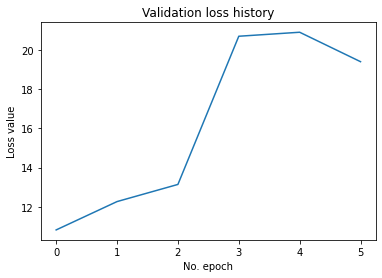

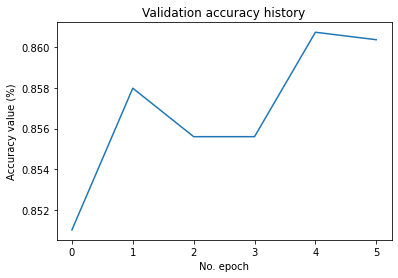

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import Sequence

img_size=48
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,validation_split=0.3)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

history=model.fit(train_generator,epochs=6,verbose=1, validation_data=validation_generator)
score = model.evaluate( validation_generator, verbose=0)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

#Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()